In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = scipy.io.loadmat('./train_32x32.mat')

In [2]:
# reshaping data to required format
print('X dimensions before:', dataset['X'].shape)
print('y dimensions before:', dataset['y'].shape)
x_data = dataset['X'].transpose((3,0,1,2)).reshape((73257,32*32*3))
y_data = dataset['y'].flatten()
print('X dimensions after:',x_data.shape)
print('y dimensions after:',y_data.shape)

# print(y_data.min(), y_data.max())    # note: y values range from 1 to 10



X dimensions before: (32, 32, 3, 73257)
y dimensions before: (73257, 1)
X dimensions after: (73257, 3072)
y dimensions after: (73257,)


In [3]:
# random 2500 samples from dataset where dataset['y'] = 0 to 9
random_samples = np.empty((0,3072))
y = np.empty((0,))

for i in range(0,10):
    x_temp = x_data[y_data%10 == i]
    y_temp = y_data[y_data%10 == i]
    random_indices = np.random.choice(x_temp.shape[0], 2500)
    random_samples = np.append(random_samples,x_temp[random_indices],axis=0)
    y = np.append(y,y_temp[random_indices],axis=0)
    # print(random_samples.shape)

ten_samples = np.array([random_samples[i] for i in range(0,24999,2500)])
y_ten_samples = np.array([y[i] for i in range(0,24999,2500 )])
random_samples, y = shuffle(random_samples,y,random_state=0) # shuffle randomly in unison

In [4]:
# Create a PCA object and fit it to the standardized data
pca = PCA()
pca.fit(random_samples)

PCA()

In [5]:
# Transform the data to its principal components
pca_data = pca.transform(random_samples)
print(pca_data.shape)

(25000, 3072)


In [6]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_

Number of components required for a variance ratio of at least 0.9 is 27
Proportion of Variance for 27 components is 0.902209592486737


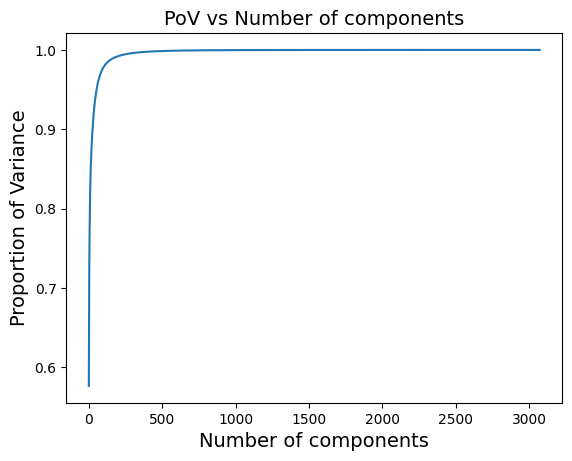

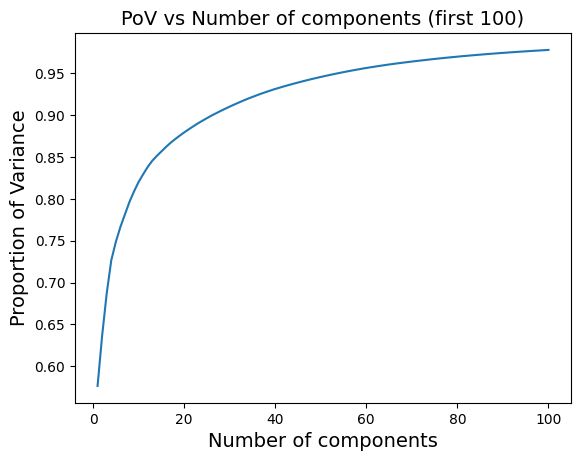

In [7]:
# Plotting Proportion of Variance (PoV) against the number of eigenvectors

# cumulative sum of eigenvalues
cumulative_pov = np.cumsum(var_ratio)
num_eigen = 0
for i in range(0,len(cumulative_pov)):
    if cumulative_pov[i] >= 0.9:
        print('Number of components required for a variance ratio of at least 0.9 is', i+1)
        print('Proportion of Variance for {} components is {}'.format(i+1,cumulative_pov[i]))
        num_eigen = i+1
        break

# print(cumulative_pov[25])       # required 26 eigenvectors
plt.plot(range(1,len(cumulative_pov) + 1), cumulative_pov)
plt.title('PoV vs Number of components',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

plt.plot(range(1,101), cumulative_pov[:100])
plt.title('PoV vs Number of components (first 100)',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

In [8]:
# STEPS
# TODO: get 10 samples DONE
# TODO: transform to pca
# TODO: plot and print values along first 10 eigenvectors




In [9]:
# make a transform matrix for pca using only top 26 eigenvectors

# transform_matrix = eigenvectors[:num_eigen]
# trans_samples2 = np.matmul(ten_samples,transform_matrix.T)
trans_samples = pca.transform(ten_samples)


print('1')
print(trans_samples.shape)
print(trans_samples)
# print('2')
# print(trans_samples2.shape)
# print(trans_samples2)

1
(10, 3072)
[[-3.02470178e+03  7.63133008e+02  7.32951878e+02 ... -4.03965031e-01
  -1.52690171e-02 -1.60086478e-01]
 [ 3.00105108e+03  7.13709120e+02 -1.21591332e+03 ...  3.06459466e-01
  -2.76976453e-01 -1.78239438e-01]
 [-5.98826477e+02 -1.40651274e+03  2.61046689e+02 ... -1.73543416e-01
  -1.81002352e-01  1.37015391e-01]
 ...
 [-2.28657696e+03  2.02149458e+02  3.84457050e+02 ... -7.84656838e-03
   5.11881108e-02 -2.92307401e-01]
 [ 2.38330812e+03  2.55525733e+03  3.14543755e+02 ... -2.35285886e-01
   4.22856457e-01 -3.76598649e-02]
 [ 3.81564086e+03  7.03252211e+02  5.44224868e+02 ...  2.18415179e-01
   1.18651875e-01  1.95451983e-02]]


Sample for digit 0


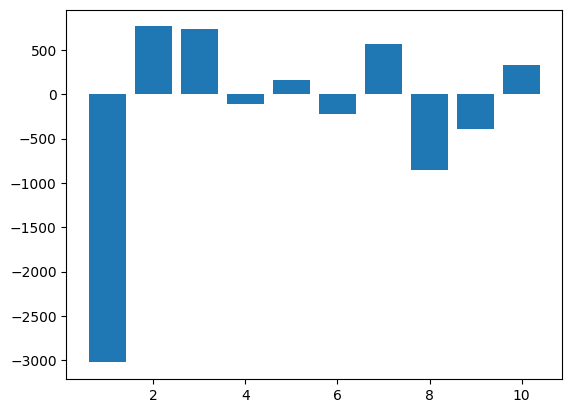

Sample for digit 1


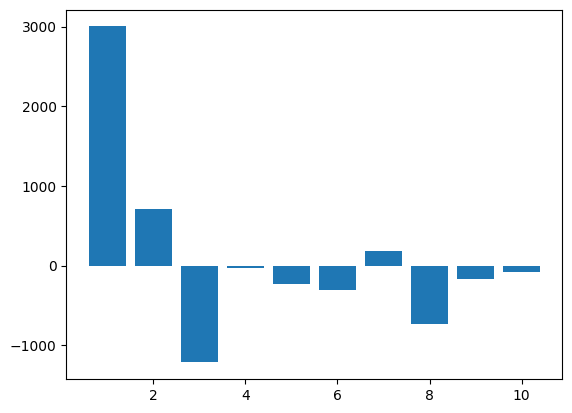

Sample for digit 2


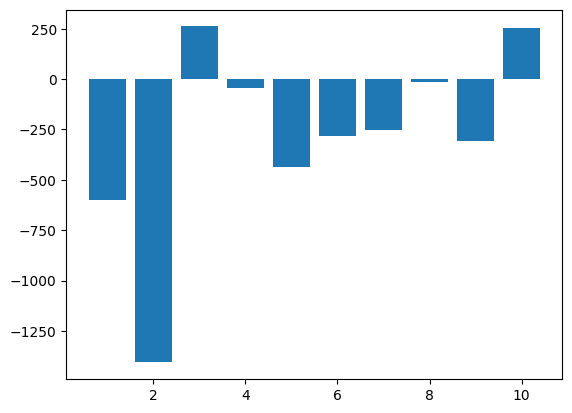

Sample for digit 3


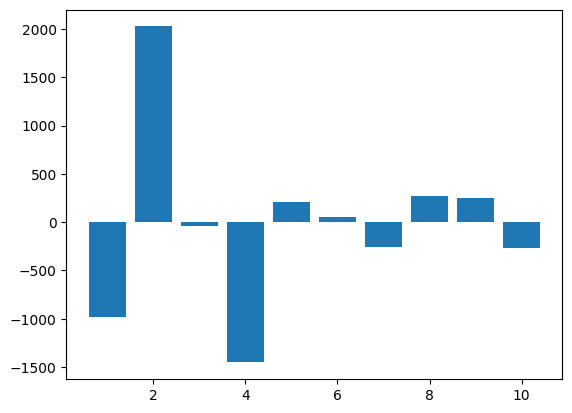

Sample for digit 4


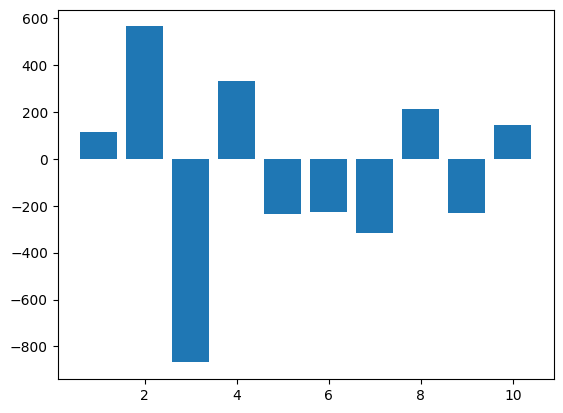

Sample for digit 5


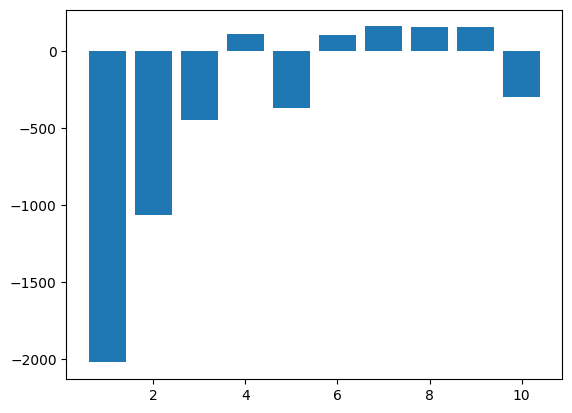

Sample for digit 6


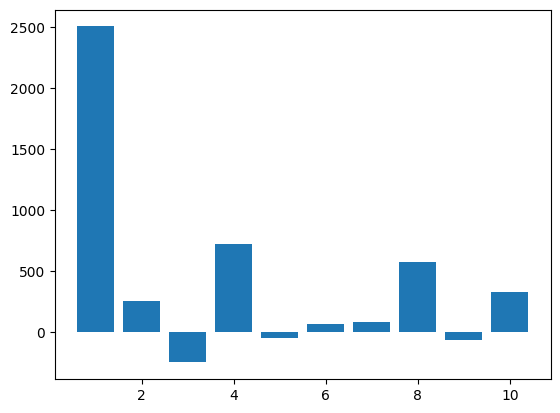

Sample for digit 7


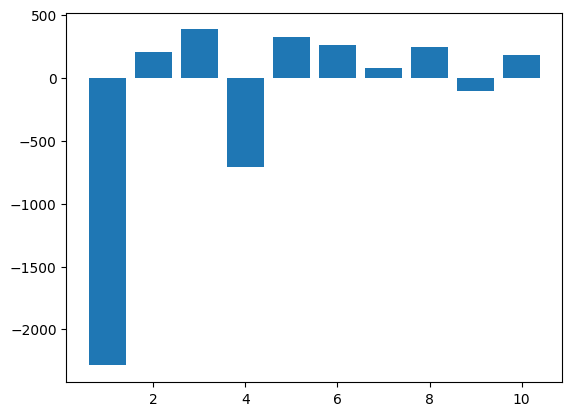

Sample for digit 8


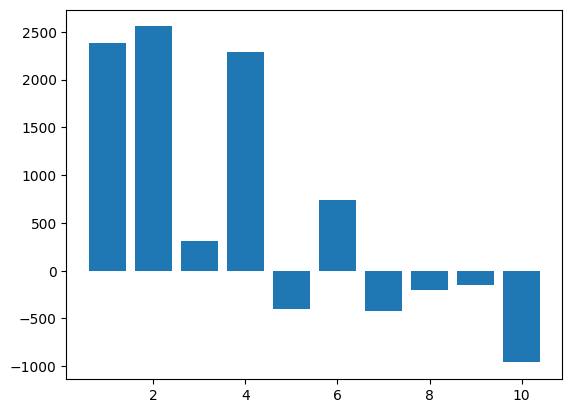

Sample for digit 9


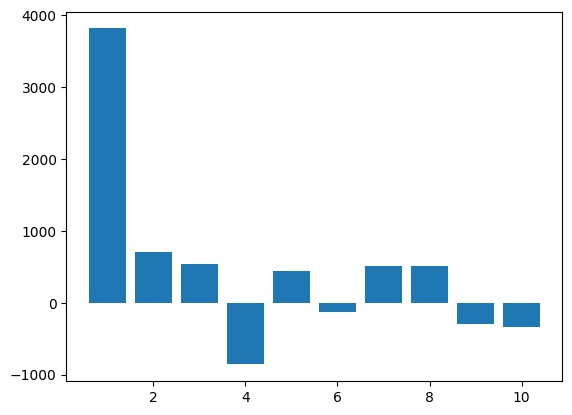

In [10]:
for i in range(0,10):
    print('Sample for digit', i)
    sample_i = trans_samples[i][:10]
    plt.bar(range(1,11), sample_i)
    plt.show()

In [11]:
new_transformed_data = trans_samples
for i in range(0,len(new_transformed_data)):
    new_transformed_data[i][11:] = 0

ten_samples_reconstructed = pca.inverse_transform(new_transformed_data)

print(ten_samples_reconstructed.shape)
print(new_transformed_data)
print(ten_samples_reconstructed)

(10, 3072)
[[-3024.70178173   763.13300802   732.95187778 ...     0.
      0.             0.        ]
 [ 3001.05108164   713.70911991 -1215.91331961 ...     0.
      0.             0.        ]
 [ -598.82647657 -1406.51274416   261.04668919 ...     0.
      0.             0.        ]
 ...
 [-2286.57696297   202.14945757   384.45704974 ...     0.
      0.             0.        ]
 [ 2383.30812185  2555.25733261   314.54375497 ...     0.
      0.             0.        ]
 [ 3815.64085566   703.25221139   544.22486825 ...     0.
      0.             0.        ]]
[[ 26.69024077  32.7777899   50.94439452 ...  55.43046111  62.6771545
   77.71460431]
 [191.86301979 203.37966259 211.51540868 ... 154.25404157 159.79078488
  166.84114444]
 [113.38034395 114.94063509 116.69130591 ... 125.62156421 130.34468527
  131.56639253]
 ...
 [ 76.36709597  71.57636839  72.98483422 ...  73.93513813  69.53261207
   72.83475111]
 [ 75.95026271  83.61701423 115.55317199 ...  71.79662903  75.47347405
  101.51175655

[18. 21. 49. ... 19. 22. 66.]


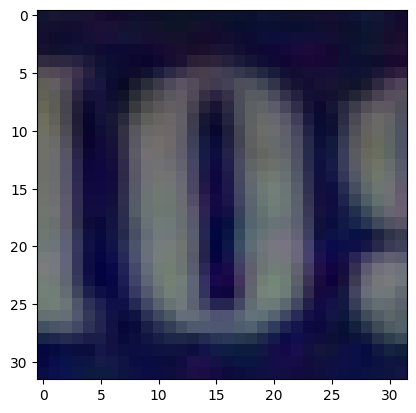

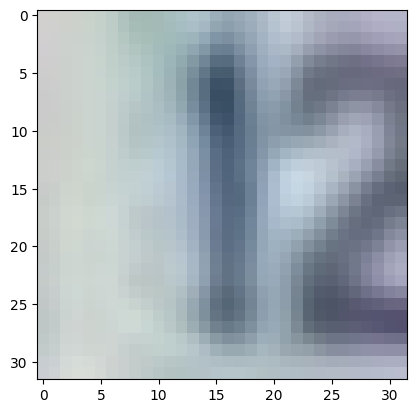

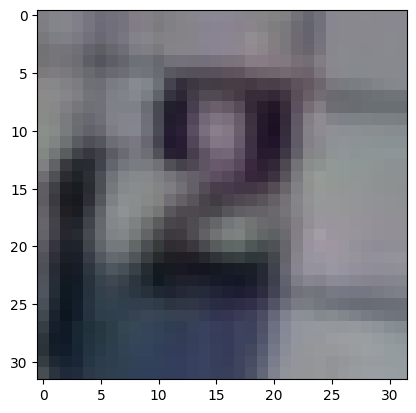

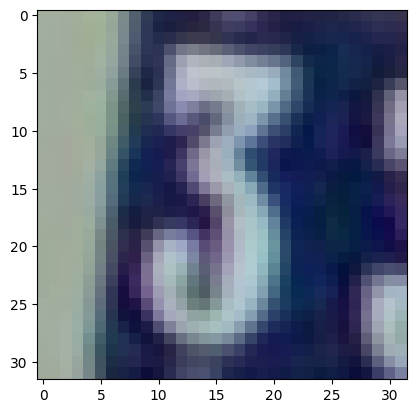

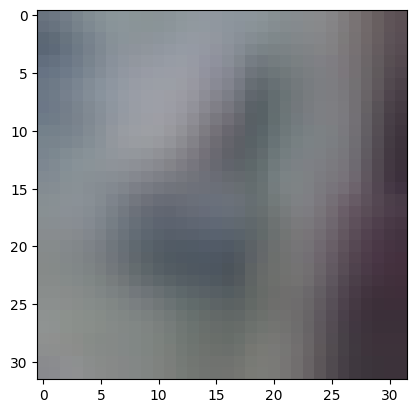

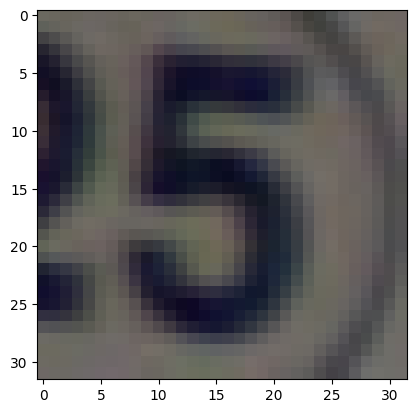

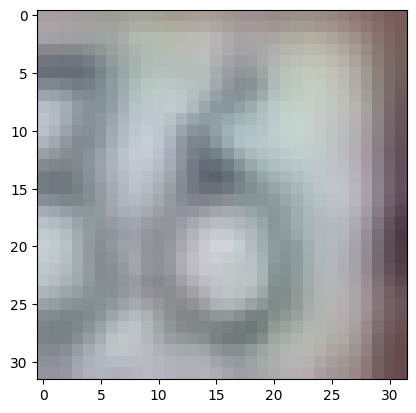

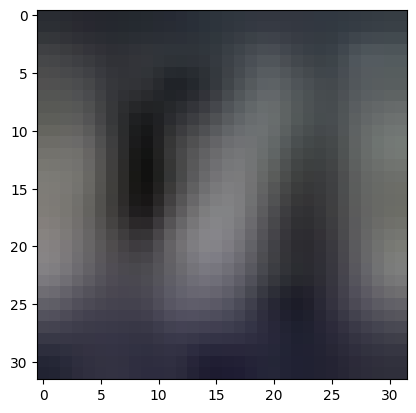

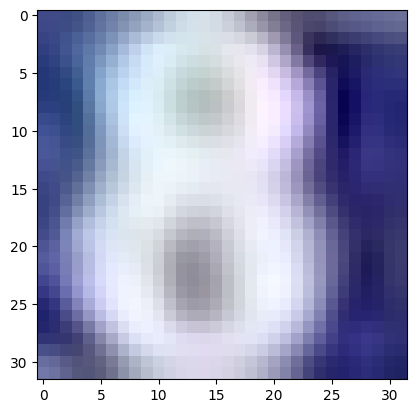

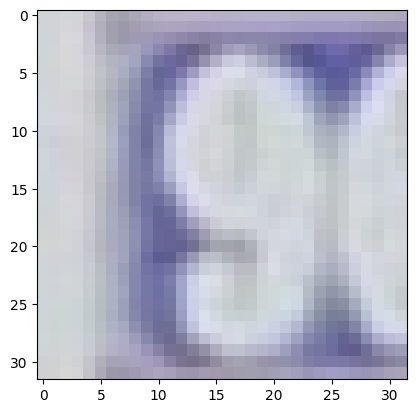

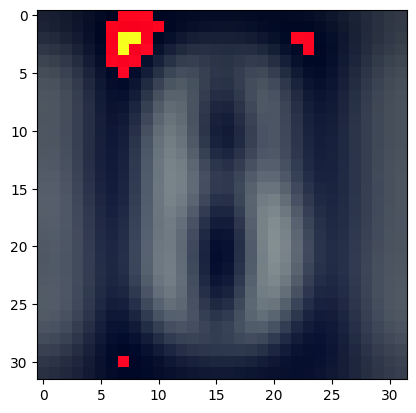

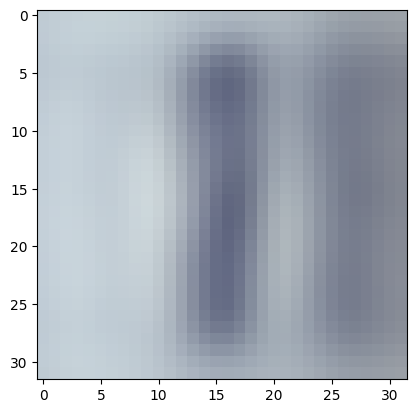

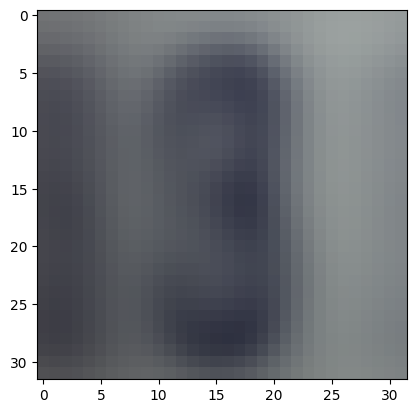

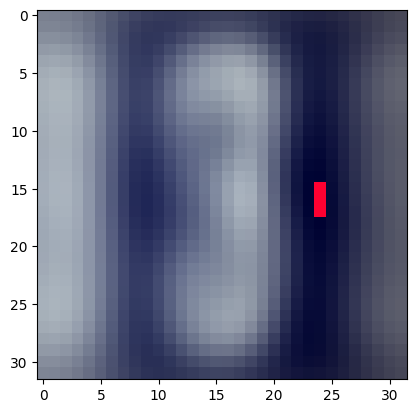

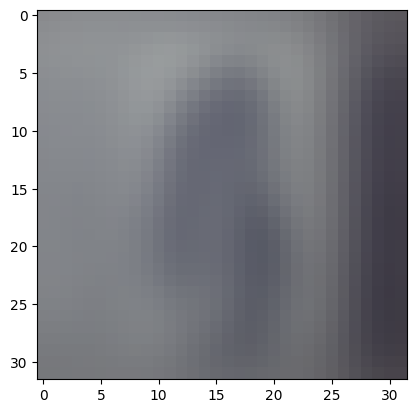

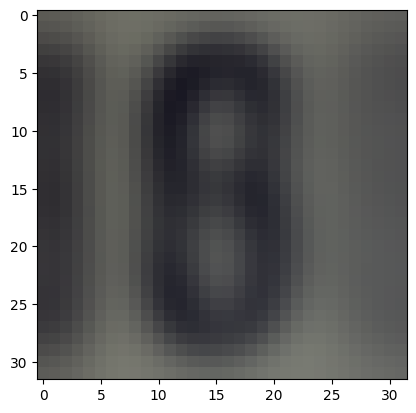

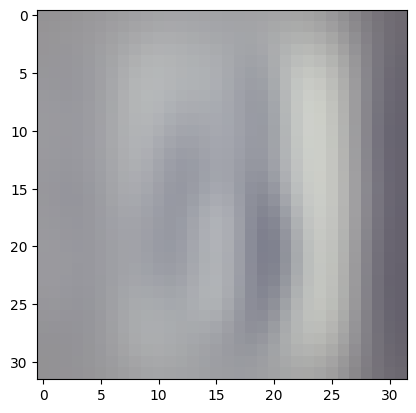

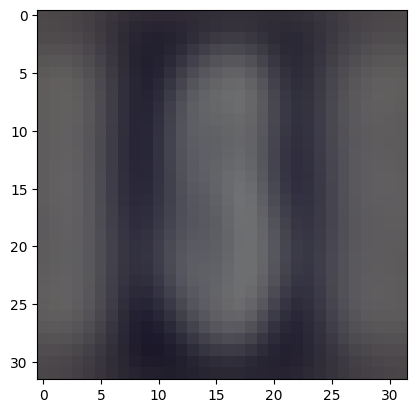

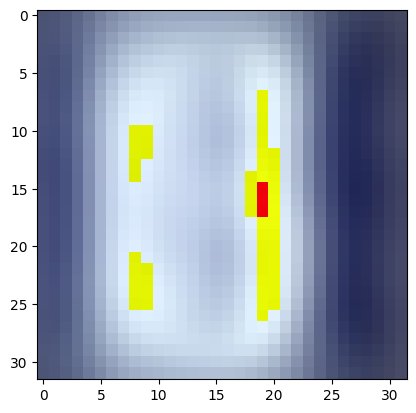

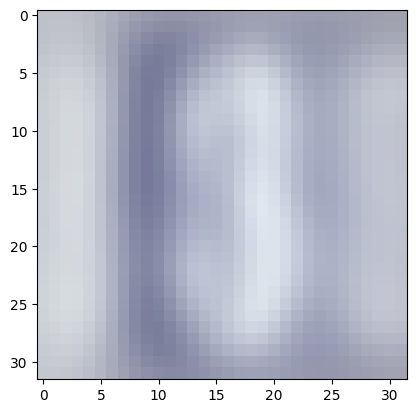

In [12]:
print(ten_samples[0])
def features_to_image(features):
    features = features.astype('uint8').reshape((32,32,3))
    plt.figure()
    plt.imshow(features)
    # plt.imshow(features_reconstructed)

# features_to_image(ten_samples[1])

# for i in range(0,10):
    # features_to_image(ten_samples[i])
for i in range(0,len(ten_samples)):
    features_to_image(ten_samples[i])

for i in range(0,len(ten_samples)):
    features_to_image(ten_samples_reconstructed[i])
# features_to_image(ten_samples_reconstructed[0])



# plot 2d image rgb
# plt.imshow(ten_samples[0].astype('uint8').reshape((32,32,3)))# 

In [13]:
# (a)
x_raw_data = random_samples
y_raw_data = y
x_pca_data = pca_data
y_pca_data = y

# (b)
x_ten_data = ten_samples
y_ten_data = y_ten_samples
x_ten_pca_data = trans_samples
y_ten_pca_data = y_ten_samples

np.save('./x_raw_data.npy',x_raw_data)
np.save('./y_raw_data.npy',y_raw_data)
np.save('./x_pca_data.npy',x_pca_data)
np.save('./y_pca_data.npy',y_pca_data)
np.save('./x_ten_data.npy',x_ten_data)
np.save('./y_ten_data.npy',y_ten_data)
np.save('./x_ten_pca_data.npy',x_ten_pca_data)
np.save('./y_ten_pca_data.npy',y_ten_pca_data)

test_dataset = scipy.io.loadmat('./test_32x32.mat')
x_test = test_dataset['X'].transpose((3,0,1,2)).reshape((26032,32*32*3))
y_test = test_dataset['y'].flatten()

In [14]:
# k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_pca_data,y_pca_data)

preds = knn_model.predict(x_test)

accuracy = accuracy_score(y_test,preds)

print('Accuracy of KNN model on raw data is', accuracy)



Accuracy of KNN model on raw data is 0.11816226183159188
